In [1]:
from luwiji.neural_network import illustration, demo

# PyTorch was meant to be flexible

jadi tidak ada workflow yang sangklak dan dikembalikan ke masing-masing orang. 

berikut workflow :

- siapkan dataset dan dataloader
- bangun arsitekstur
- persiapan training -> MCO
- training loop

# Sample data

In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split

X = np.random.rand(500, 4)
y = np.random.rand(500, 3)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

# Step 1: Dataset dan Dataloader

In [8]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [6]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [9]:
train_set = TensorDataset(X_train, y_train)
test_set = TensorDataset(X_test, y_test)

In [10]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32)

# Step 2 : Bangun Arsitekstur

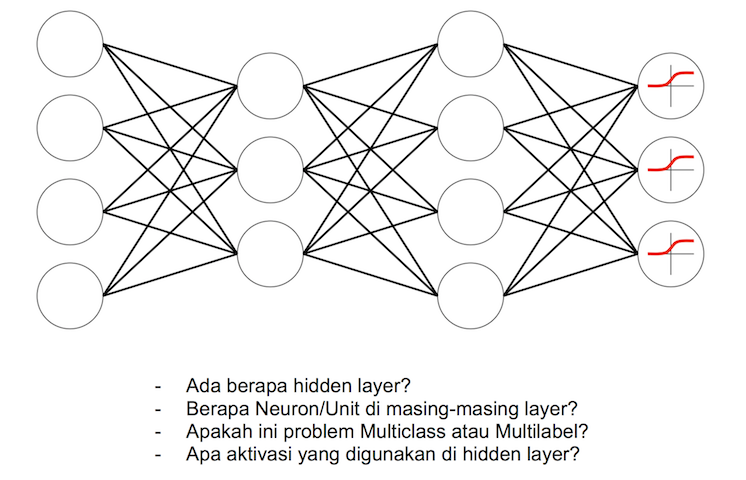

In [11]:
illustration.quiz

In [12]:
from torch import nn

In [13]:
nn.Sequential(
    nn.Linear(4,3),
    nn.ReLU(),
    nn.Linear(3,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Sigmoid()
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

# Step 3 : Training Preparation -> MCO

## Model

In [14]:
model = nn.Sequential(
    nn.Linear(4,3),
    nn.ReLU(),
    nn.Linear(3,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Sigmoid()
)

## Criterion

In [22]:
criterion = nn.MSELoss() # model diakhiri linear -> untuk regresi
# criterion = nn.NLLLoss() # model diakhiri logsoftmax -> multiclass clf
# criterion = nn.BCELoss() # model diakhiri sigmoid -> binary clf, multilabel clf

## Optimizer

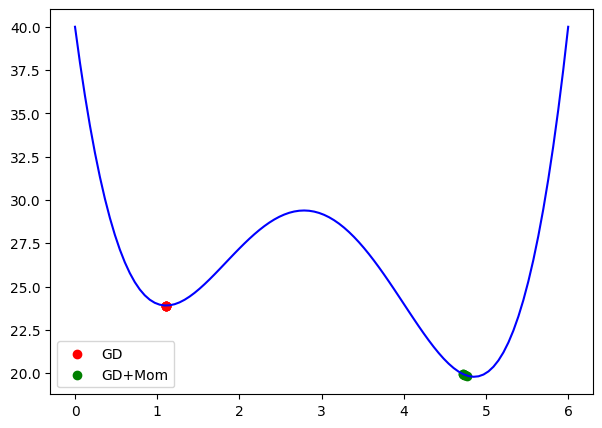

In [16]:
demo.momentum()

In [17]:
from torch import optim

In [21]:
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [20]:
# from jcopdl.optim import RAdam, Ranger, RangerLARS, Ralamb

# Step 4 : Training Loop

In [34]:
epochs = 500
train_cost = []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in train_loader:
        output = model(feature) # feedforward
        loss = criterion(output, target)
        loss.backward() # backpropragation
        optimizer.step() # update weight
        optimizer.zero_grad()
        cost += loss.item() * feature.shape[0]
    train_cost.append(cost / len(train_set))
    print(f"\rEpoch : {i+1}/{epochs} | Train Costs : {train_cost[-1]:4f}", end=" ")

Epoch : 500/500 | Train Costs : 0.082600 

In [35]:
import matplotlib.pyplot as plt

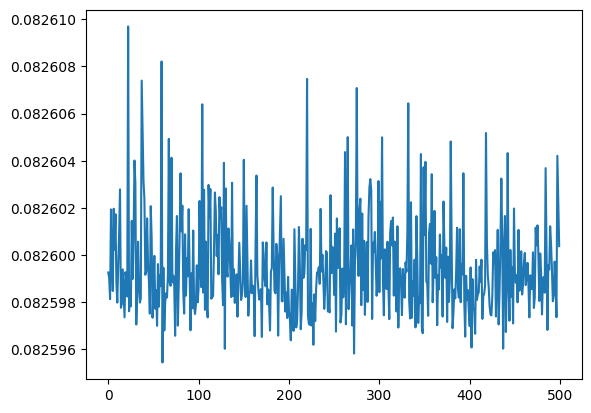

In [36]:
plt.plot(train_cost)